In [1]:
from __future__ import print_function, division
import numpy as np
import MDAnalysis as mda

In [2]:
def get_cogs(structure, trajectory, barrelsel, start=0, stop=-1, step=1):
    u = mda.Universe(structure, trajectory)
    protein = u.select_atoms("name BB")
    protein = protein.select_atoms(barrelsel)
    cog = protein.center_of_geometry()
    upper_protein = protein.select_atoms("prop z >= {}".format(cog[2]))
    lower_protein = protein.select_atoms("prop z < {}".format(cog[2]))
    sections = {"upper": upper_protein, "lower": lower_protein}
    cogs = {"upper":[], "lower":[]}
    times = []
    for frame in u.trajectory[start:stop:step]:
        times.append(frame.time / 1000)
        for layer in sections:
            #print(sections[layer][0].position)
            cog = sections[layer].center_of_geometry(pbc=False)
            #print(sections[layer])
            cogs[layer].append(cog)
    for layer in cogs:
        #print(cogs[layer])
        cogs[layer] = np.array(cogs[layer]) / 10.
    return cogs, np.array(times)

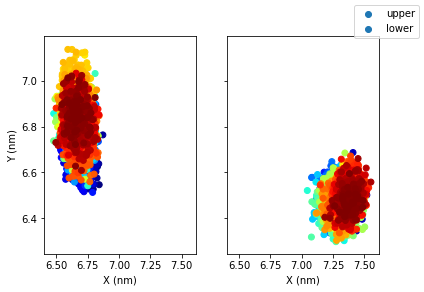

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig, axarray = plt.subplots(1, 2, sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], label="upper", cmap=cm.jet, c=range(cogs['upper'].shape[0]))
axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], label="lower", cmap=cm.jet, c=range(cogs['upper'].shape[0]))
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
fig.legend()

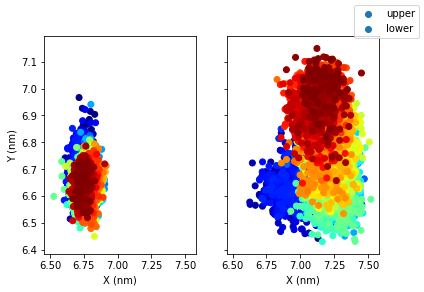

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig, axarray = plt.subplots(1, 2, sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], label="upper", cmap=cm.jet, c=range(cogs['upper'].shape[0]))
axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], label="lower", cmap=cm.jet, c=range(cogs['upper'].shape[0]))
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
fig.legend()

In [62]:
wdir = "/media/jon/PhDparty/membrane_proteins/OMPX/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 48:61 88:105 131 137 12 21", start=0, stop=30001)
times = times / 1000

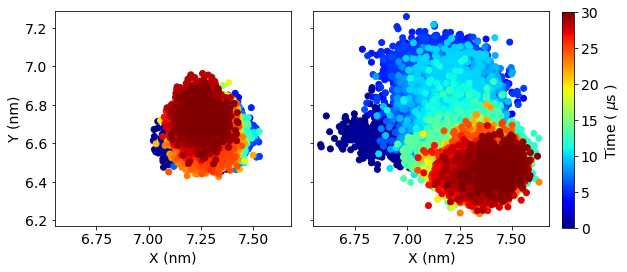

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})

#times = times * 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
axarray[0].set_xlim(6.55, 7.68)
axarray[0].set_ylim(6.17, 7.29)
cax = fig.add_axes([0.99, 0.18, 0.02, 0.75]) 
fig.colorbar(fill, label=r'Time ( $\mu$s )', orientation='vertical', cax = cax)
#colorbar.set_label(r'Time ( $\mu$s )')
fig.tight_layout()
fig.savefig('ompx_cog_0_30_microseceonds.pdf', dpi=300, bbox_inches='tight')

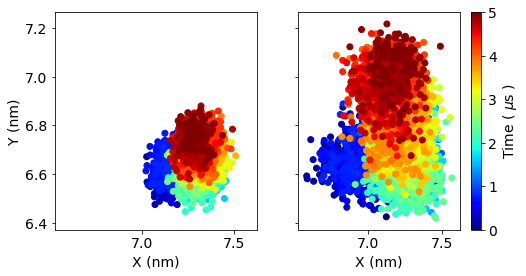

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/OMPX/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 48:61 88:105 131 137 12 21", start=0, stop=5001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
colorbar = fig.colorbar(fill)
colorbar.set_label(r'Time ( $\mu$s )')
fig.savefig('ompx_cog_0_5_microseceonds.pdf', dpi=300)

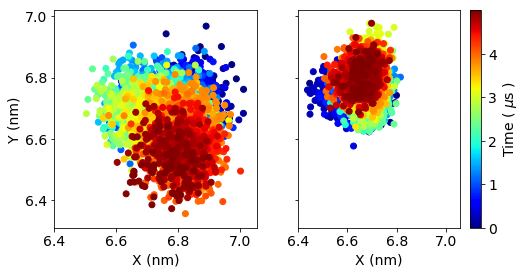

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/OMPX/RE/"
cogs, times = get_cogs(wdir+"production_whole_trns.gro", wdir+"production_whole_trns.xtc", "not resid 48:61 88:105 131 137 12 21", start=0, stop=5000)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
axarray[0].set_xlim(6.55, 7.68)
axarray[0].set_ylim(6.17, 7.29)
colorbar = fig.colorbar(fill)
colorbar.set_label(r'Time ( $\mu$s )')
fig.savefig('ompx_cog_0_5_microseceonds.eps', dpi=300)

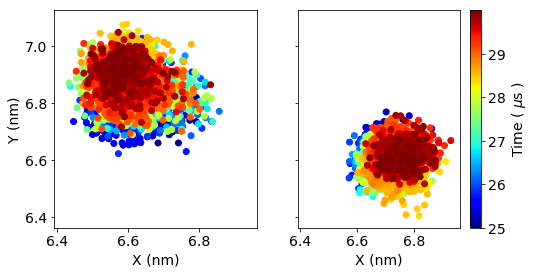

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/OMPX/RE/"
cogs, times = get_cogs(wdir+"production_whole_trns.gro", wdir+"production_whole_trns.xtc", "not resid 48:61 88:105 131 137 12 21", start=25000, stop=30000)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
colorbar = fig.colorbar(fill)
colorbar.set_label(r'Time ( $\mu$s )')
fig.savefig('ompx_cog_0_5_microseceonds.eps', dpi=300)

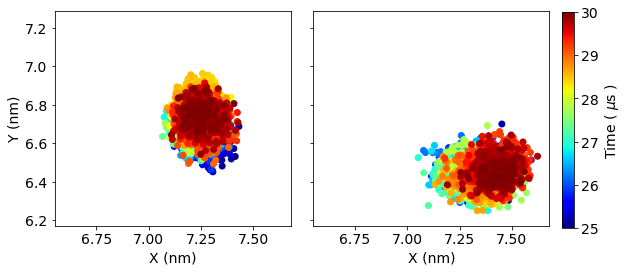

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/OMPX/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 48:61 88:105 131 137 12 21", start=25000, stop=30001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
axarray[0].set_xlim(6.55, 7.68)
axarray[0].set_ylim(6.17, 7.29)
#colorbar = fig.colorbar(fill)
cax = fig.add_axes([0.99, 0.18, 0.02, 0.75]) 
fig.colorbar(fill, label=r'Time ( $\mu$s )', orientation='vertical', cax = cax)
#colorbar.set_label(r'Time ( $\mu$s )')
fig.tight_layout()
fig.savefig('ompx_cog_25_30_microseceonds.pdf', dpi=300, bbox_inches='tight')

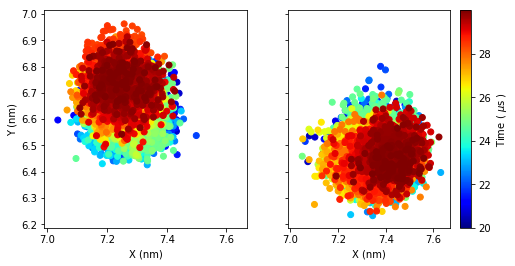

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
wdir = "/media/jon/PhDparty/membrane_proteins/OMPX/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 48:61 88:105 131 137 12 21", start=20000, stop=30000)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
colorbar = fig.colorbar(fill)
colorbar.set_label(r'Time ( $\mu$s )')
fig.savefig('ompx_cog_20_30_microseceonds.eps', dpi=300)

In [66]:
wdir = "/media/jon/PhDparty/membrane_proteins/OMPA/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 1:4 146:158 17:33 60:73 103:118", start=0, stop=30001)
times = times / 1000

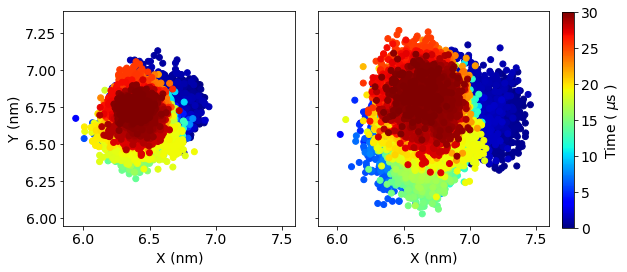

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})

fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
axarray[0].set_xlim(5.85, 7.6)
axarray[0].set_ylim(5.95, 7.4)
cax = fig.add_axes([0.99, 0.18, 0.02, 0.75]) 
fig.colorbar(fill, label=r'Time ( $\mu$s )', orientation='vertical', cax = cax)
#colorbar.set_label(r'Time ( $\mu$s )')
fig.tight_layout()
fig.savefig('ompa_cog_0_30_microseceonds.pdf', dpi=300, bbox_inches='tight')

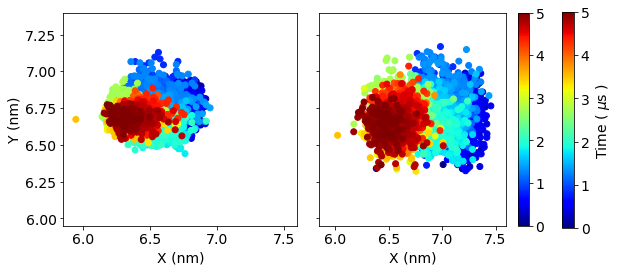

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/OMPA/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 1:4 146:158 17:33 60:73 103:118", start=0, stop=5001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
colorbar = fig.colorbar(fill)
axarray[0].set_xlim(5.85, 7.6)
axarray[0].set_ylim(5.95, 7.4)
cax = fig.add_axes([0.99, 0.18, 0.02, 0.75]) 
fig.colorbar(fill, label=r'Time ( $\mu$s )', orientation='vertical', cax = cax)
#colorbar.set_label(r'Time ( $\mu$s )')
fig.tight_layout()
fig.savefig('ompa_cog_0_5_microseceonds.pdf', dpi=300, bbox_inches='tight')

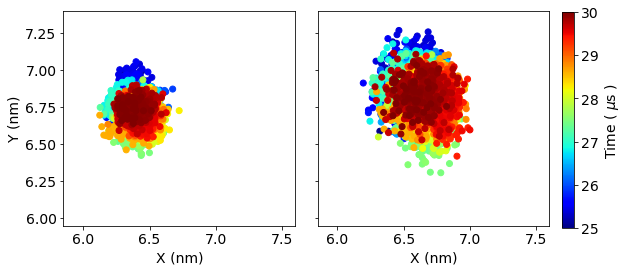

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/OMPA/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 1:4 146:158 17:33 60:73 103:118", start=25000, stop=30001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
axarray[0].set_xlim(5.85, 7.6)
axarray[0].set_ylim(5.95, 7.4)
cax = fig.add_axes([0.99, 0.18, 0.02, 0.75]) 
fig.colorbar(fill, label=r'Time ( $\mu$s )', orientation='vertical', cax = cax)
#colorbar.set_label(r'Time ( $\mu$s )')
fig.tight_layout()
fig.savefig('ompa_cog_25_30_microseceonds.pdf', dpi=300, bbox_inches='tight')

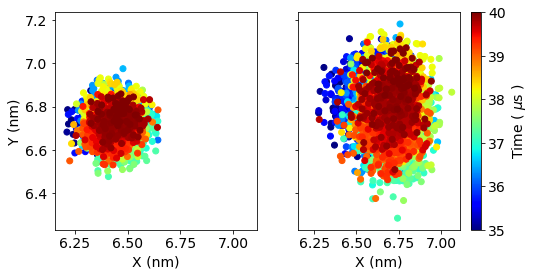

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/OMPA/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 1:4 146:158 17:33 60:73 103:118", start=35000, stop=40001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
colorbar = fig.colorbar(fill)
colorbar.set_label(r'Time ( $\mu$s )')
fig.savefig('ompa_cog_35_40_microseceonds.eps', dpi=300)

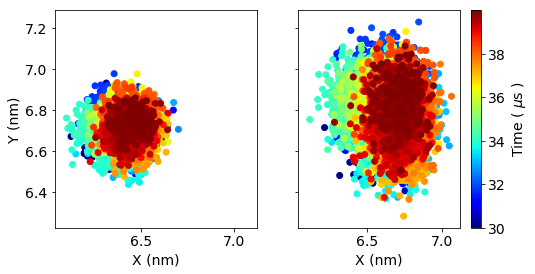

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/OMPA/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 1:4 146:158 17:33 60:73 103:118", start=30000, stop=40000)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
colorbar = fig.colorbar(fill)
colorbar.set_label(r'Time ( $\mu$s )')
fig.savefig('ompa_cog_30_40_microseceonds.eps', dpi=300)

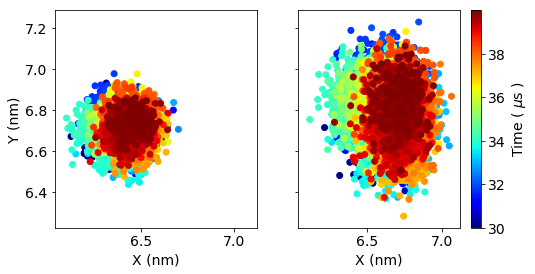

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/OMPA/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 1:4 146:158 17:33 60:73 103:118", start=30000, stop=40000)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
colorbar = fig.colorbar(fill)
colorbar.set_label(r'Time ( $\mu$s )')
fig.savefig('ompa_cog_20_30_microseceonds.eps', dpi=300)

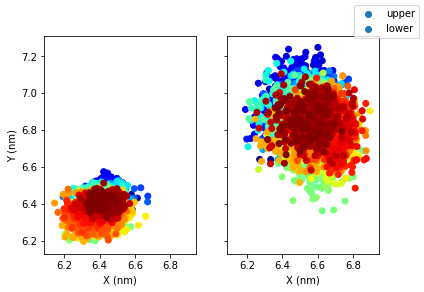

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig, axarray = plt.subplots(1, 2, sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], label="upper", cmap=cm.jet, c=range(cogs['upper'].shape[0]))
axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], label="lower", cmap=cm.jet, c=range(cogs['upper'].shape[0]))
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
fig.legend()

In [54]:
mpl.__version__

'2.2.2'

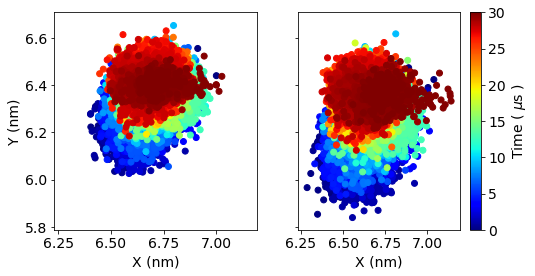

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/BTUB/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 1:137 485:500 523:545 438:461 392:416 318:338 360:369 270:296 223:247 175:199 568:584", start=0, stop=30001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
colorbar = fig.colorbar(fill)
colorbar.set_label(r'Time ( $\mu$s )')
fig.savefig('btub_cog_0_30_microseceonds.eps', dpi=300)

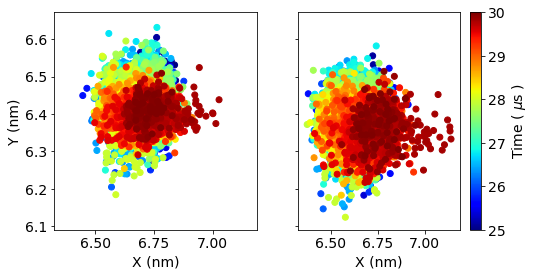

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/BTUB/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 1:137 485:500 523:545 438:461 392:416 318:338 360:369 270:296 223:247 175:199 568:584", start=25000, stop=30001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
colorbar = fig.colorbar(fill)
colorbar.set_label(r'Time ( $\mu$s )')
fig.savefig('btub_cog_25_30_microseceonds.eps', dpi=300)

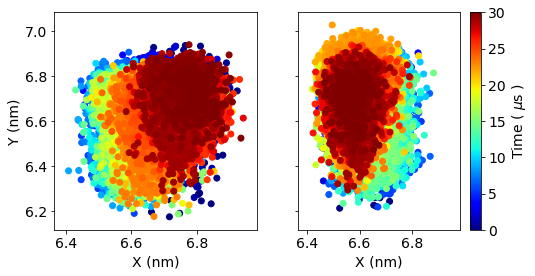

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/FHUA/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 1:160 308:350 386:438 243:274 558:576 515:524 605:618 470:482 653:664 700:712 205:207 365:370 185:189 633:639 678:682", start=0, stop=30001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
colorbar = fig.colorbar(fill)
colorbar.set_label(r'Time ( $\mu$s )')
fig.savefig('fhua_cog_0_30_microseceonds.eps', dpi=300)

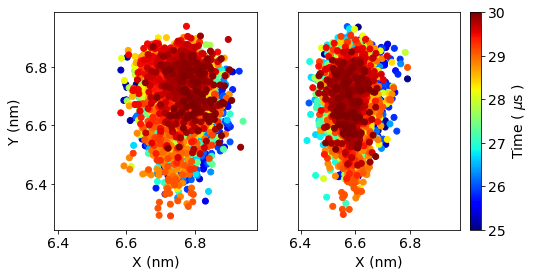

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/FHUA/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 1:160 308:350 386:438 243:274 558:576 515:524 605:618 470:482 653:664 700:712 205:207 365:370 185:189 633:639 678:682", start=25000, stop=30001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
colorbar = fig.colorbar(fill)
colorbar.set_label(r'Time ( $\mu$s )')
fig.savefig('fhua_cog_25_30_microseceonds.eps', dpi=300)

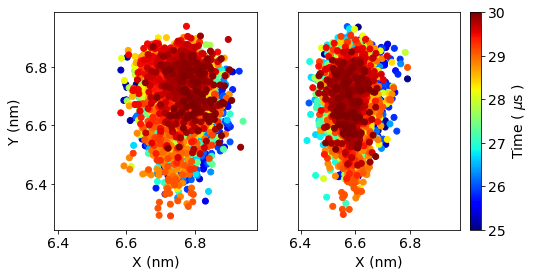

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/FHUA/RE/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", "not resid 1:160 308:350 386:438 243:274 558:576 515:524 605:618 470:482 653:664 700:712 205:207 365:370 185:189 633:639 678:682", start=25000, stop=30001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
colorbar = fig.colorbar(fill)
colorbar.set_label(r'Time ( $\mu$s )')
fig.savefig('fhua_cog_25_30_microseceonds.eps', dpi=300)

In [71]:
wdir = "/media/jon/PhDparty/membrane_proteins/OMPA/DPPC/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", 
                       "not resid 1:4 146:158 17:33 60:73 103:118", stop=20001)
times = times / 1000

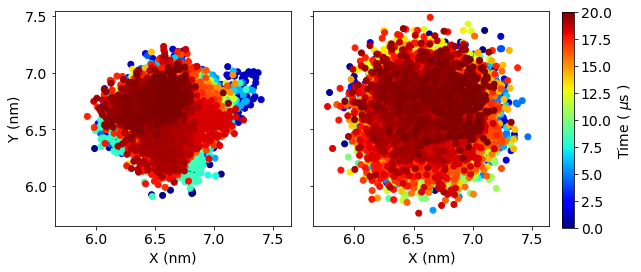

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})

fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
axarray[0].set_xlim(5.65, 7.65)
axarray[0].set_ylim(5.65, 7.55)

cax = fig.add_axes([0.99, 0.18, 0.02, 0.75]) 
fig.colorbar(fill, label=r'Time ( $\mu$s )', orientation='vertical', cax = cax)
#colorbar.set_label(r'Time ( $\mu$s )')
fig.tight_layout()
fig.savefig('ompa_cog_0_20_microseceonds_DPPC.pdf', dpi=300, bbox_inches='tight')

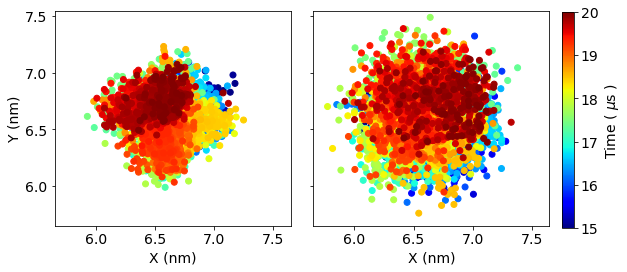

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/OMPA/DPPC/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", 
                       "not resid 1:4 146:158 17:33 60:73 103:118", start=15000, stop=20001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
axarray[0].set_xlim(5.65, 7.65)
axarray[0].set_ylim(5.65, 7.55)

cax = fig.add_axes([0.99, 0.18, 0.02, 0.75]) 
fig.colorbar(fill, label=r'Time ( $\mu$s )', orientation='vertical', cax = cax)
#colorbar.set_label(r'Time ( $\mu$s )')
fig.tight_layout()
fig.savefig('ompa_cog_15_20_microseceonds_DPPC.pdf', dpi=300, bbox_inches='tight')

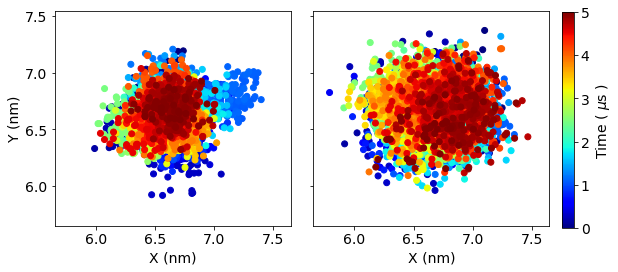

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/OMPA/DPPC/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", 
                       "not resid 1:4 146:158 17:33 60:73 103:118", start=0, stop=5001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
axarray[0].set_xlim(5.65, 7.65)
axarray[0].set_ylim(5.65, 7.55)

cax = fig.add_axes([0.99, 0.18, 0.02, 0.75]) 
fig.colorbar(fill, label=r'Time ( $\mu$s )', orientation='vertical', cax = cax)
#colorbar.set_label(r'Time ( $\mu$s )')
fig.tight_layout()
fig.savefig('ompa_cog_0_5_microseceonds_DPPC.pdf', dpi=300, bbox_inches='tight')

In [75]:
wdir = "/media/jon/PhDparty/membrane_proteins/OMPX/DPPC/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", 
                       "not resid 48:61 88:105 131 137 12 21", stop=20001)
times = times / 1000

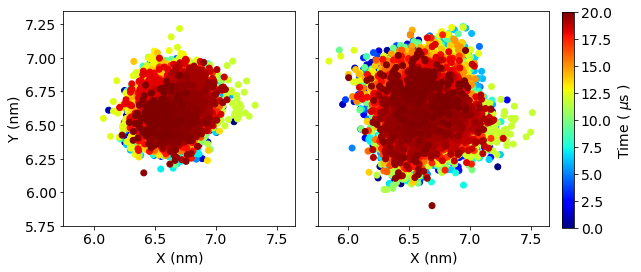

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
axarray[0].set_xlim(5.75, 7.65)
axarray[0].set_ylim(5.75, 7.35)

cax = fig.add_axes([0.99, 0.18, 0.02, 0.75]) 
fig.colorbar(fill, label=r'Time ( $\mu$s )', orientation='vertical', cax = cax)
#colorbar.set_label(r'Time ( $\mu$s )')
fig.tight_layout()
fig.savefig('ompx_cog_0_20_microseceonds_DPPC.pdf', dpi=300, bbox_inches='tight')

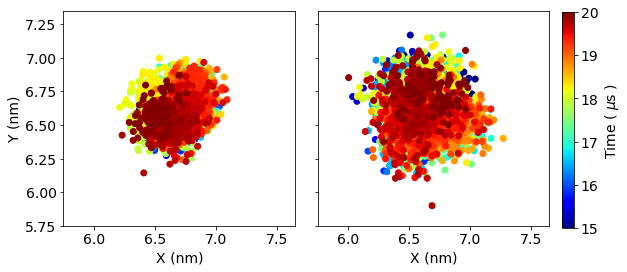

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/OMPX/DPPC/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", 
                       "not resid 48:61 88:105 131 137 12 21", start=15000, stop=20001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
axarray[0].set_xlim(5.75, 7.65)
axarray[0].set_ylim(5.75, 7.35)
#axarray[0].set_xlim(6.55, 7.68)
#axarray[0].set_ylim(6.17, 7.29)
#colorbar = fig.colorbar(fill)
cax = fig.add_axes([0.99, 0.18, 0.02, 0.75]) 
fig.colorbar(fill, label=r'Time ( $\mu$s )', orientation='vertical', cax = cax)
#colorbar.set_label(r'Time ( $\mu$s )')
fig.tight_layout()

fig.savefig('ompx_cog_15_20_microseceonds_DPPC.pdf', dpi=300, bbox_inches='tight')

In [14]:
np.std(cogs["lower"][:, 0]), np.std(cogs["upper"][:, 0]), np.std(cogs["lower"][:, 1]), np.std(cogs["upper"][:, 1])

(0.17436087, 0.1209995, 0.16507977, 0.11853204)

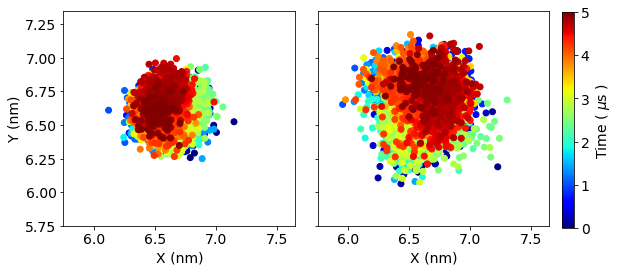

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

mpl.rcParams.update({'font.size': 14})
wdir = "/media/jon/PhDparty/membrane_proteins/OMPX/DPPC/"
cogs, times = get_cogs(wdir+"production_whole.gro", wdir+"production_whole.xtc", 
                       "not resid 48:61 88:105 131 137 12 21", start=0, stop=5001)
times = times / 1000
fig, axarray = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axarray[0].scatter(cogs['upper'][:, 0], cogs['upper'][:, 1], cmap=cm.jet, c=times)
fill = axarray[1].scatter(cogs['lower'][:, 0], cogs['lower'][:, 1], cmap=cm.jet, c=times)
axarray[0].set_xlabel('X (nm)')
axarray[0].set_ylabel('Y (nm)')
axarray[1].set_xlabel('X (nm)')
axarray[0].set_xlim(5.75, 7.65)
axarray[0].set_ylim(5.75, 7.35)
cax = fig.add_axes([0.99, 0.18, 0.02, 0.75]) 
fig.colorbar(fill, label=r'Time ( $\mu$s )', orientation='vertical', cax = cax)
fig.tight_layout()

fig.savefig('ompx_cog_0_5_microseceonds_DPPC.pdf', dpi=300, bbox_inches='tight')